## <center>**QUIZ #2 EDA</center>**

<div style="text-align: justify;">
Para responder las preguntas correspondientes al quiz, primero importaremos las librerías de Python necesarias, posteriormente se importa el dataset <b><a href="https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction">DoorDash ETA Prediction.</a></b>
</div>



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/home/danielhz19/Documents/VSCode/UCV/ELECTIVAS/DM/data/historical_data.csv")
df = pd.DataFrame(data)
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


<div style="text-align: justify;">
Para responder a la primera pregunta, es necesario notar que la columna "subtotal" contiene el precio total de un pedido, por lo que es necesario calcular la suma de dicho precio por cada tienda usando la columna "store_id" y luego obtener la que posea el mayor valor.
</div>

In [2]:
store_costs = df.groupby('store_id')['subtotal'].sum()
store_id_max = store_costs.idxmax()
cost_max = store_costs.max()

data1 = [[store_id_max, cost_max]]
df_p1 = pd.DataFrame(data1, columns = ["store_id", "total_cost"])
df_p1

,store_id,total_cost
0,6074,2636241


<div style="text-align: justify;">
Para la pregunta número 2, debemos agrupar usando la columna "store_primary_category" con el valor de "pizza" y posteriormente eliminar las tiendas duplicadas.
</div>

In [3]:
pizza_store = df[df['store_primary_category'] == "pizza"].drop_duplicates(subset = ['store_id'])

<div style="text-align: justify;">
Por último, se deben contar la cantidad de filas para saber el número total de tiendas diferentes que venden pizza.
</div>

In [4]:
different_pizza_stores_p2 = pizza_store.shape[0]
different_pizza_stores_p2

1088

<div style="text-align: justify;">
Para responder a la pregunta número 3 es necesario calcular el coeficiente de correlación entre las variables 'num_distinct_items' y 'estimated_store_to_consumer_driving_duration'
</div>

In [5]:
correlation_coef_p3 = df['num_distinct_items'].corr(df['estimated_store_to_consumer_driving_duration'])
correlation_coef_p3

0.02269348221725634

<div style="text-align: justify;">
Con este resultado, podemos asumir que ambas variables no están relacionadas, dado que el coeficiente de correlación tiene un valor cercano a 0. Para visualizarlo de una mejor manera usaremos un gráfico de dispersión.
</div>

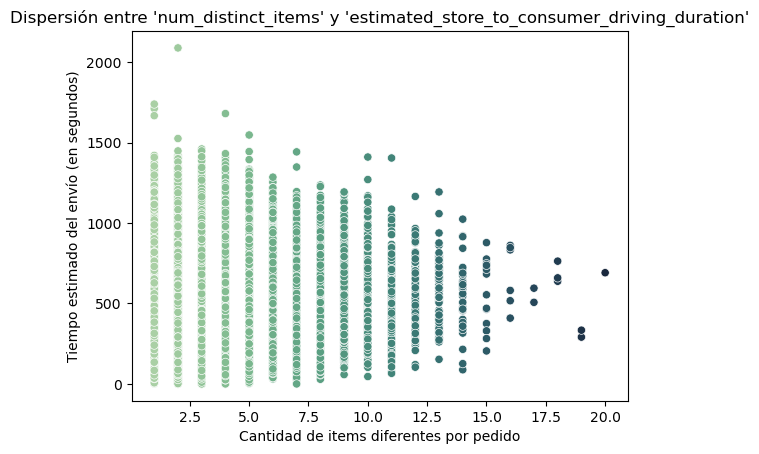

In [6]:
sns.scatterplot(
    x = df['num_distinct_items'],
    y = df['estimated_store_to_consumer_driving_duration'],
    hue = df['num_distinct_items'],
    palette="ch:r=-.5,l=.75",
    legend = False
)

plt.title("Dispersión entre 'num_distinct_items' y 'estimated_store_to_consumer_driving_duration'")
plt.xlabel('Cantidad de items diferentes por pedido')
plt.ylabel('Tiempo estimado del envío (en segundos)')

plt.show()

<div style="text-align: justify;">

</div>

<div style="text-align: justify;">
Para responder a la pregunta #4 debemos calcular la diferencia entre 'actual_delivery_time' y 'created_at', lo cual nos dará el tiempo que tarda un pedido en entregarse. Posteriormente obtendremos el 'store_primary_category' para responder a la pregunta
</div>

In [7]:
less_time_df_p4 = pd.DataFrame()

less_time_df_p4['order_food_type'] = df['store_primary_category']
less_time_df_p4['delivery_duration_time'] = pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at'])
less_time_df_p4 = less_time_df_p4.dropna()

less_time_df_p4.sort_values(by = 'delivery_duration_time').head(1)

,order_food_type,delivery_duration_time
63294,mexican,0 days 00:01:41


<div style="text-align: justify;">
Por último, en la pregunta #5 es necesario contar la cantidad de veces que se repite un valor de la variable 'market_id', ya que esta representa una ubicación física donde opera DoorDash.

Posteriormente se debe ordenar por cantidad de apariciones de forma ascendente, resultando así nuestra primera fila, la ubicación con menos órdenes.
</div>

In [8]:
df_location_p5 = df['market_id'].value_counts()

min_order_location = df_location_p5.sort_values().head(1).index[0].astype(int)

min_order_location

6

<div style="text-align: justify;">
Una vez obtenida la ubicación con menor cantidad de pedidos, creamos un data frame con todos los datos de dichos pedidos, con la finalidad de agrupar aquellos que se hicieron entre las 5 PM y 10 PM. Si observamos su tiempo promedio de entrega, podremos inferir cual de ellas es la más indicada para hacer un pedido nuevo.
</div>

In [18]:
df_hours_p5 = df[df['market_id'] == min_order_location]
df_hours_p5['delivery_duration_time'] = pd.to_datetime(df_hours_p5['actual_delivery_time']) - pd.to_datetime(df_hours_p5['created_at'])
df_hours_p5['created_at'] = pd.to_datetime(df_hours_p5['created_at'])

mean_time_data = {
    'hours': ['5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM'],
    'mean_delivery_time': [
        (df_hours_p5[(df_hours_p5['created_at'].dt.time >= pd.to_datetime('17:00:00').time()) & (df_hours_p5['created_at'].dt.time <= pd.to_datetime('17:59:59').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60,
        (df_hours_p5[(df_hours_p5['created_at'].dt.time >= pd.to_datetime('18:00:00').time()) & (df_hours_p5['created_at'].dt.time <= pd.to_datetime('18:59:59').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60,
        (df_hours_p5[(df_hours_p5['created_at'].dt.time >= pd.to_datetime('19:00:00').time()) & (df_hours_p5['created_at'].dt.time <= pd.to_datetime('19:59:59').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60,
        (df_hours_p5[(df_hours_p5['created_at'].dt.time >= pd.to_datetime('20:00:00').time()) & (df_hours_p5['created_at'].dt.time <= pd.to_datetime('20:59:59').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60,
        (df_hours_p5[(df_hours_p5['created_at'].dt.time >= pd.to_datetime('21:00:00').time()) & (df_hours_p5['created_at'].dt.time <= pd.to_datetime('21:59:59').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60,
        (df_hours_p5[(df_hours_p5['created_at'].dt.time == pd.to_datetime('22:00:00').time())].sort_values(by = 'created_at')['delivery_duration_time'].mean()).total_seconds()/60
    ]
}

df_mean_time_p5 = pd.DataFrame(mean_time_data)
df_mean_time_p5

/tmp/ipykernel_1350/1750036995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours_p5['delivery_duration_time'] = pd.to_datetime(df_hours_p5['actual_delivery_time']) - pd.to_datetime(df_hours_p5['created_at'])
/tmp/ipykernel_1350/1750036995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours_p5['created_at'] = pd.to_datetime(df_hours_p5['created_at'])


,hours,mean_delivery_time
0,5 PM,45.585031
1,6 PM,45.328621
2,7 PM,46.648372
3,8 PM,44.862126
4,9 PM,42.811625
5,10 PM,NaN


<div style="text-align: justify;">
Para facilitar el entendimiento del resultado, se procede a realizar un gráfico de barras para visualizar la distribución de pedidos entre las 5 PM y 10 PM.
</div>

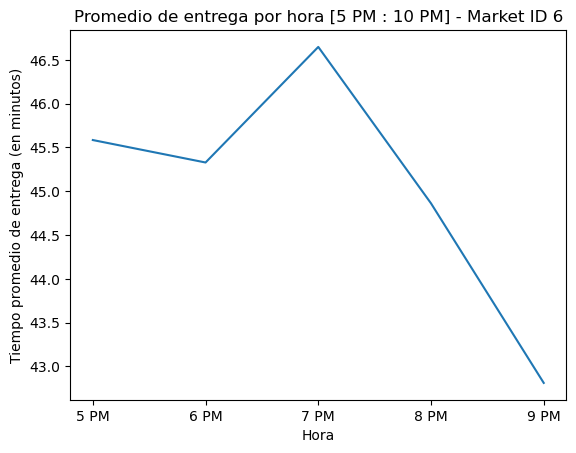

In [26]:
sns.lineplot(
    x = 'hours',
    y = 'mean_delivery_time',
    data=df_mean_time_p5
)

plt.title('Promedio de entrega por hora [5 PM : 10 PM] - Market ID 6')
plt.xlabel('Hora')
plt.ylabel('Tiempo promedio de entrega (en minutos)')

plt.show()

<div style="text-align: justify;">
Con base en estos resultados, podemos concluir que la mejor hora para realizar un pedido es a las 9 PM, ya que durante esta hora el tiempo promedio de entrega es el menor de todas las horas seleccionadas
</div>